# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.DataFrame.from_csv('HR_comma_sep.csv')
df=df.reset_index()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing these concepts to see if we can find interesting paths to go down which may provide insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also, compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull 50 random samples of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing Python code to do just that.


In [4]:
#1.What is the probability that a randomly selected employee left the company? What about experienced a work accident? 
#Also, compute the probability that a randomly selected employee left the company and experienced a work accident.

length=df.shape[0]
#lets choose a random person n=1000 times, and check the average probability. 
#As n get bigger, the average probability should converge to the population average: number of employes left/total nr of employees 
import random

random.seed(1234)
#if I give in a sed, where does it goes to the random nr generator??
prob_left=[]
prob_acc=[]
prob_left_acc=[]
nr_trials=10000

pop_prob_left_acc=df[(df.Work_accident==1) & (df.left==1)].shape[0]/length

for i in range(nr_trials):
    rnd=random.randint(0, length)
    prob_left.append(df.left[rnd])
    prob_acc.append(df.Work_accident[rnd])
    if df.left[rnd]==1 and df.Work_accident[rnd]==1:
        prob_left_acc.append(1)
    else:
        prob_left_acc.append(0)    
    i=i+1

In [5]:
#Answer 1.
print("The probability, that a random employee left the company is {},".format(np.mean(prob_left)) \
      + "while this probability from the population is {}.".format(round(df.left.mean(),4)) )  

print("The probability, that a random employee had a work accident is {},".format(np.mean(prob_acc)) \
      + "while this probability from the population is {}.".format(round(df.Work_accident.mean(),4)) )  

print("The probability, that a random employee left the company and had accident is {},".format(np.mean(prob_left_acc)) \
      + "while this probability from the population is {}.".format(round(pop_prob_left_acc,4)) )  

The probability, that a random employee left the company is 0.236,while this probability from the population is 0.2381.
The probability, that a random employee had a work accident is 0.1505,while this probability from the population is 0.1446.
The probability, that a random employee left the company and had accident is 0.011,while this probability from the population is 0.0113.


In [6]:
#2.Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company. 
#Compare these results to the same percentiles for those that did not leave. What can you say about the results?

In [7]:
df_left=df[df.left==1]
df_nonleft=df[df.left==0]

percentiles=[25,50,90]

for p in percentiles:
    print( "The {}th percentile for the satisfaction level score of people who left the company is ".format(p) \
      + "{} and for people who didn't leave is {}.".format(np.percentile(df_left['satisfaction_level'],p),np.percentile(df_nonleft['satisfaction_level'],p)))

#The distribution of the satisfactory level is left sided for people who left the company, so they were more iunsatisfied that employees who stayed.

The 25th percentile for the satisfaction level score of people who left the company is 0.13 and for people who didn't leave is 0.54.
The 50th percentile for the satisfaction level score of people who left the company is 0.41 and for people who didn't leave is 0.69.
The 90th percentile for the satisfaction level score of people who left the company is 0.84 and for people who didn't leave is 0.94.


In [8]:
#3.Compute the variance and standard deviation of hours worked.
print("The standard deviation of hours worked is {}.".format(df['average_montly_hours'].std()))
print("The variance of hours worked is {}.".format(df['average_montly_hours'].var()))



The standard deviation of hours worked is 49.943099371284305.
The variance of hours worked is 2494.313174809979.


In [9]:
#4.Compare the variance between the satisfaction levels of employees who left versus those who stayed. 
#Which is larger? What does this mean?
print("The variance between the satisfaction levels of employees who left is {}.".format(df_left['satisfaction_level'].var()))
print("The variance between the satisfaction levels of employees who didn't leave is {}.".format(df_nonleft['satisfaction_level'].var()))

#The variance of employees who didn't leave is smaller. That means, the range of the satisfactory score are larger, the spread is much wider by employees who left.

The variance between the satisfaction levels of employees who left is 0.06966085873834325.
The variance between the satisfaction levels of employees who didn't leave is 0.04713404022655909.


In [10]:
#5. Compute the mean satisfaction level for each salary category. Comment on your results.
salaries=df['salary'].unique()

for s in salaries:
    avg_s=df[df['salary']==s]['satisfaction_level'].mean()
    print("The average satisfaction level for {} salaries is {}.". format(s,round(avg_s,4)))

#The higher the salary is, the more satisfied the employees are.

The average satisfaction level for low salaries is 0.6008.
The average satisfaction level for medium salaries is 0.6218.
The average satisfaction level for high salaries is 0.6375.


In [11]:
#6. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.
avg_hours=df['average_montly_hours'].mean()
std_hours=df['average_montly_hours'].std()

for s in salaries:
    total_s=df[df['salary']==s].shape[0]
    count=df[(df['salary']==s) & (df['average_montly_hours']>avg_hours + 2* std_hours)].shape[0]
    prob=count/total_s
    
    print("The probability that employees with {} salary worked more than two standard deviations"  .format(s)\
          + " of the average monthly hours across all groups is {}." .format(round(prob,4)))

The probability that employees with low salary worked more than two standard deviations of the average monthly hours across all groups is 0.0135.
The probability that employees with medium salary worked more than two standard deviations of the average monthly hours across all groups is 0.009.
The probability that employees with high salary worked more than two standard deviations of the average monthly hours across all groups is 0.0016.


In [12]:
# There is a higher probability by employees with lower salary, 
# that they work more then 2times the standard deviation of the average monthly hours across all groups.

In [13]:
#8. probability of left based on the salary ->left|salary)

print("The average leaving ratio is {} ." .format(round(df['left'].mean(), 4)))

for s in salaries:
    total_s=df[df['salary']==s].shape[0]
    count=df[(df['salary']==s) & (df['left']==1)].shape[0]
    prob=count/total_s
    
    print("The probability that an employee with {} salary leaves is {}."  .format(s, round(prob,4)))
#Employees with lower slaalry are leaving more often (almost 30%) then employees with high salary (6,7%)

The average leaving ratio is 0.2381 .
The probability that an employee with low salary leaves is 0.2969.
The probability that an employee with medium salary leaves is 0.2043.
The probability that an employee with high salary leaves is 0.0663.


In [14]:
#9. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee? Comment on your results.
prom_high=df[(df['salary']=='high') & (df['promotion_last_5years']==1)].shape[0]
prob_high=prom_high/df[(df['salary']=='high')].shape[0]
odds_high=prom_high/df[(df['salary']=='high') & (df['promotion_last_5years']==0)].shape[0]

prom_low=df[(df['salary']=='low') & (df['promotion_last_5years']==1)].shape[0]
prob_low=prom_low/df[(df['salary']=='low')].shape[0]
odds_low=prom_low/df[(df['salary']=='low') & (df['promotion_last_5years']==0)].shape[0]

print("The probability that an employee with high salary gets a promosion is {}.". format(round(prob_high,4)))
print("The probability that an employee with low salary gets a promosion is {}.". format(round(prob_low,4)))
print("The odds ratio of an employee with a high salary getting a promotion within the past five years " \
      + " versus a low salary employee is {}." .format(round(odds_high/odds_low,4)))

# Getting a promotion in the last 5 years by employees with hig salary is almost 6 times more likely, then by employees with low salary.

The probability that an employee with high salary gets a promosion is 0.0582.
The probability that an employee with low salary gets a promosion is 0.009.
The odds ratio of an employee with a high salary getting a promotion within the past five years  versus a low salary employee is 6.7889.


In [15]:
#10. Suppose we were to pull 50 random samples of employee satisfaction levels. 
#What would approximately be the mean of this sample? What would be the mean of, say, 10 sets of random samples?
#Demonstrate your assertions by writing Python code to do just that.
random.seed(1234)

def sample_satisfaction(data, nr_trials, n_sample):
    length=data.shape[0]
    prob_sat_sample=[]
    for i in range(nr_trials):
        sat_sample=[]
        for n in range(n_sample):
            rnd=random.randint(0, length)
            sat_sample.append(data.satisfaction_level[rnd])
        prob_sat_sample.append(np.mean(sat_sample))
    return np.mean(prob_sat_sample)
    
print( "The mean of the satisfaction levels of 50 random employees is {}. ".format( round(sample_satisfaction(df, 1,50),4)))
print( "The mean of the satisfaction levels of 50 random employees of 10 samples is {}. ".format( round(sample_satisfaction(df, 10,50),4)))


The mean of the satisfaction levels of 50 random employees is 0.5922. 
The mean of the satisfaction levels of 50 random employees of 10 samples is 0.6114. 


## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin clip or medical test giving a positive or negative result.  Typically, we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by 
$$ P(X = x) = p^x (1 - p)^{1 - x} $$
Bernoulli random variables crop up very often in statistical analysis, most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the k variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting exactly 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting at 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

In [16]:
#1. Bernoulli variables are:
# - Work_accident
# - left
# - promotion_last_5years

In [17]:
#2.For the k variables you identified in part 1, compute the probabilities  pkpk , of each having a positive  (x=1) result.
variables=['Work_accident','left', 'promotion_last_5years']

for var in variables:
    prob=df[df[var]==1].shape[0]/df.shape[0]
    print( " The probability that the value of the column {} is positive (= 1) is {}." .format(var, round(prob, 4)))

 The probability that the value of the column Work_accident is positive (= 1) is 0.1446.
 The probability that the value of the column left is positive (= 1) is 0.2381.
 The probability that the value of the column promotion_last_5years is positive (= 1) is 0.0213.


In [18]:
# 3.Compute the variance of each of the variables in part 2 using  pkpk  as described above.

for var in variables:
    prob=df[df[var]==1].shape[0]/df.shape[0]
    std=(prob*(1-prob))**(0.5)
    print( " The standard deviation of the column {}  is {}. With python-formula:{}" .format(var, round(std, 4), round(df[var].std(),4)))

 The standard deviation of the column Work_accident  is 0.3517. With python-formula:0.3517
 The standard deviation of the column left  is 0.4259. With python-formula:0.4259
 The standard deviation of the column promotion_last_5years  is 0.1443. With python-formula:0.1443


In [19]:
# 4.For each of the k variables, compute the probability of randomly selecting 
# exactly 3500 employees with a positive result
import math
from scipy.stats import binom

def positiv_employees_pmf(n_sample, prob, x_value):
    prob_x=binom.pmf(x_value, n_sample, prob)
    #fakt=math.factorial(n_sample)/(math.factorial(x_value)*math.factorial(n_sample-x_value))
    #prob_x=(fakt)*(prob**x_value)*((1-prob)**(n_sample-x_value))
    return prob_x


In [20]:
for var in variables:
    prob=df[df[var]==1].shape[0]/df.shape[0]
    length=len(df)
    print( "The probability that of random selecting 3500  employees with a positiv result for {} is {}." .format(var, positiv_employees_pmf(length , prob, 3500)))    

The probability that of random selecting 3500  employees with a positiv result for Work_accident is 3.3494533716445012e-183.
The probability that of random selecting 3500  employees with a positiv result for left is 0.0030366192962612546.
The probability that of random selecting 3500  employees with a positiv result for promotion_last_5years is 0.0.


In [21]:
# 5. For each of the k variables, compute the probability of randomly selecting at 3500 or less with a positive result.

def positiv_employees_cdf(n_sample, prob, x_value):
    prob_x=binom.cdf(x_value, n_sample, prob)
    #fakt=math.factorial(n_sample)/(math.factorial(x_value)*math.factorial(n_sample-x_value))
    #prob_x=(fakt)*(prob**x_value)*((1-prob)**(n_sample-x_value))
    return prob_x


for var in variables:
    prob=df[df[var]==1].shape[0]/df.shape[0]
    print( "The probability that of random selecting 3500 or less employees with a positiv result for {} is {}." .format(var, positiv_employees_cdf(length , prob, 3500)))    

The probability that of random selecting 3500 or less employees with a positiv result for Work_accident is 0.9999999999999999.
The probability that of random selecting 3500 or less employees with a positiv result for left is 0.08803118104327311.
The probability that of random selecting 3500 or less employees with a positiv result for promotion_last_5years is 0.9999999999999999.


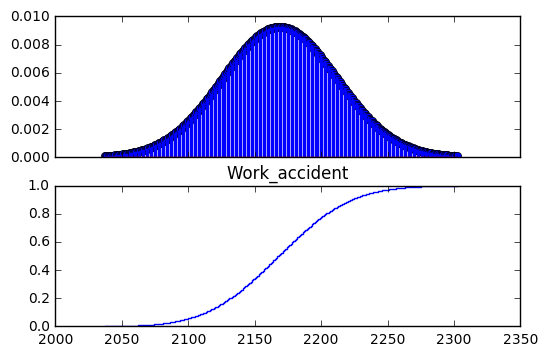

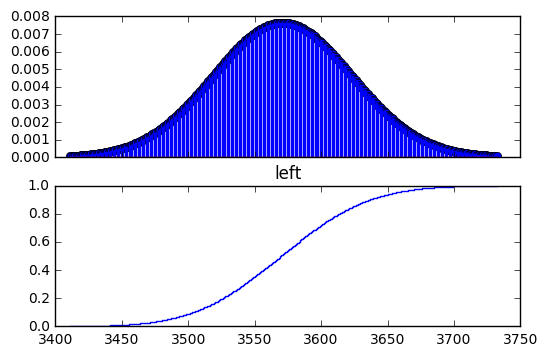

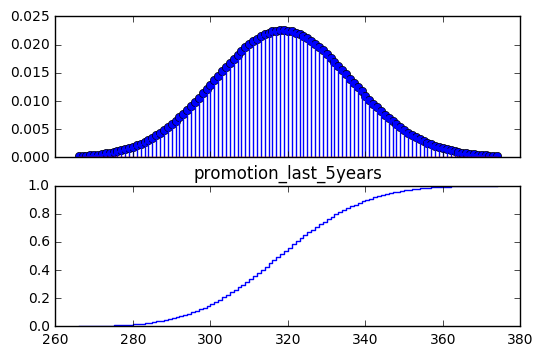

In [22]:
# 6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pmf_cdf(var, n_sample):
    prob=df[df[var]==1].shape[0]/df.shape[0]
    fig, ax = plt.subplots(2, 1)
    
    x = np.arange(binom.ppf(0.001, n_sample, prob), binom.ppf(0.999, n_sample, prob))
    
    ax[0].stem(x, binom.pmf(x, n_sample, prob))
    ax[1].step(x, binom.cdf(x, n_sample, prob))
    plt.title(var)
    ax[0].set_xticklabels([])
    #plt.legend()
    
for var in variables:    
    plot_pmf_cdf(var, length)

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Guassian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, it can be shown that the means of random variables sampled from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine variables in the HR dataset and construct normals approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
1. For the variables in part 1, plot histograms.
1. Compute the mean and variance for each of the variables used in parts 1 and 2.
1. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part 1.  Are they well approximated by normals?

In [23]:
#1. Which variables may be approximately normal?

var_norm=['average_montly_hours', 'satisfaction_level', 'last_evaluation']
from scipy import stats

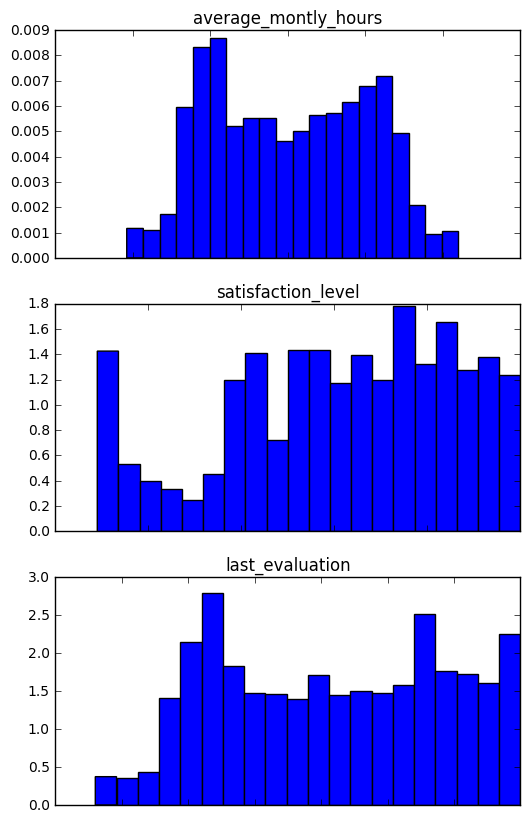

In [24]:
#2. For the variables in part 1, plot histograms.
fig, ax = plt.subplots(3, 1, figsize=(6,10))    
for i, var in enumerate(var_norm):    
    ax[i].hist(df[var], normed=True, bins=20)
    ax[i].set_title(var)
    ax[i].set_xticklabels([])


In [25]:
#3. Compute the mean and variance for each of the variables used in parts 1 and 2.
for var in var_norm: 
    df_var=df[var]
    print("The mean of the variable {} is {}, the variance is  {}." .format(var, round(df_var.mean(),2), round(df_var.var(),2)))

The mean of the variable average_montly_hours is 201.05, the variance is  2494.31.
The mean of the variable satisfaction_level is 0.61, the variance is  0.06.
The mean of the variable last_evaluation is 0.72, the variance is  0.03.


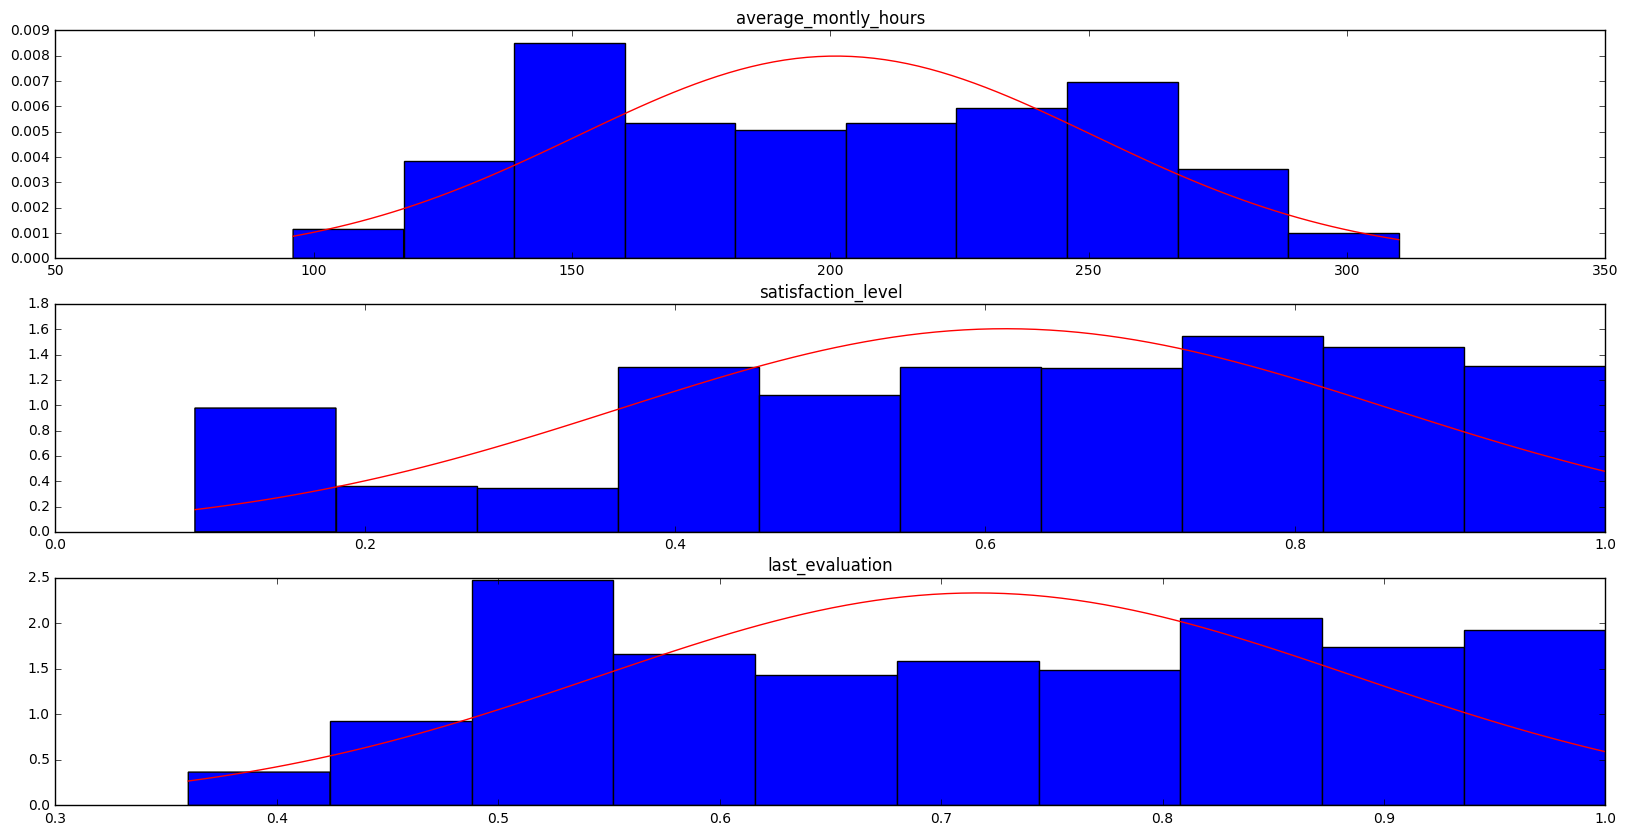

In [26]:
#4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part 1. 
#Are they well approximated by normals?

fig, ax = plt.subplots(3, 1,figsize=(20, 10))    
for i, var in enumerate(var_norm): 
    df_var=df[var]
    m=df_var.mean()
    v=df_var.var()
    ax[i].hist(df[var], normed=True)
    x=np.linspace(df_var.min(), df_var.max(), num=100)
    ax[i].plot(x, stats.norm.pdf(x, loc=m, scale=v**(0.5)), color='r')
    ax[i].set_title(var)

    


### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts, such as, the amount of clicks per advertisement and arriving flights per unit time.  It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
1. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
1. Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2.  Comment on your results.

In [27]:
# 1. What variables would be good candidates for modeling with a Poisson distribution?
var_p=['time_spend_company', 'number_project']

In [28]:
# 2. divide each by salary and fit a Poisson distribution to each.
from scipy.stats import poisson
#fig, ax = plt.subplots(2, 3,figsize=(20, 10))  
salary=df['salary'].unique()

for i_v, v in enumerate(var_p):
    for i_s,s in enumerate(salary):
        df_v_s=df[df['salary']==s][v]
        avg=df_v_s.mean()
        #x=np.linspace(poisson.ppf(0.001, avg),poisson.ppf(0.999, avg), num=100) 
        #y=poisson.pmf(x, avg)
        #ax[i_v,i_s].vlines(x,0, y, color='r')
        poisson_dist=poisson(avg)
        print("Variable: {}, salary: {}, average in data:{}, average distribution: {} ". format(v, s, avg, poisson_dist.mean()))

Variable: time_spend_company, salary: low, average in data:3.4382176052487696, average distribution: 3.4382176052487696 
Variable: time_spend_company, salary: medium, average in data:3.52901023890785, average distribution: 3.52901023890785 
Variable: time_spend_company, salary: high, average in data:3.692805173807599, average distribution: 3.692805173807599 
Variable: number_project, salary: low, average in data:3.799890650628759, average distribution: 3.799890650628759 
Variable: number_project, salary: medium, average in data:3.8135277691591685, average distribution: 3.8135277691591685 
Variable: number_project, salary: high, average in data:3.767178658043654, average distribution: 3.767178658043654 


In [29]:
#3. Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2.
for i_v, v in enumerate(var_p):
    for i_s,s in enumerate(salary):
        df_v_s=df[df['salary']==s][v]
        avg=df_v_s.mean()

        prob=poisson.cdf(avg, avg, loc=0)
        print("Variable {} with {} salary have the probability of {} for obtaining at least the mean". format(v, s, prob))
#The time_spend_company with low salary has the highest probabiltiy for obtaining at least the mean, 
#number_project with medium salary has the lowest probabiltiy for obtaining at least the mean. 


Variable time_spend_company with low salary have the probability of 0.5500213085348893 for obtaining at least the mean
Variable time_spend_company with medium salary have the probability of 0.5303858471640887 for obtaining at least the mean
Variable time_spend_company with high salary have the probability of 0.4956559688831893 for obtaining at least the mean
Variable number_project with low salary have the probability of 0.4735072151044629 for obtaining at least the mean
Variable number_project with medium salary have the probability of 0.4707211765392397 for obtaining at least the mean
Variable number_project with high salary have the probability of 0.4802227010889031 for obtaining at least the mean


### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \approx N(\mu, \sigma^2/n) = \frac{\bar{X_n} - \mu}{\sigma \sqrt{n}}$$
In this exercise, you'll conduct simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
1. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
1. Plot a histogram for each variable used in part 2.  Comment on your results.
1. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
1. Overlay a normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

In [30]:
#1. Choose two variables which may be good candidates to test this theorem.
# According to the central limit theorem, any variable could be good. I chose the variables in var_p

In [31]:
# 2. Using the variables chosen in part 1, randomly select a set of n = 10 samples and take the mean. Repeat this 1000 times for each variable.

In [32]:
nr_trials=1000
nr_sample=10
length=df.shape[0]

def random_samples(nr_sample, nr_trials, variables):
    sample_means={}
    for v in variables:
        data=df[v]
        sample_means[v]=[]
        for i in range(nr_trials):
            samples=[]
            for n in range(nr_sample):
                rnd=random.randint(0, length-1)
                samples.append(data.loc[rnd])
            sample_means[v].append(np.mean(samples))
    return sample_means
        
sample_means=random_samples(nr_sample, nr_trials, var_p)  

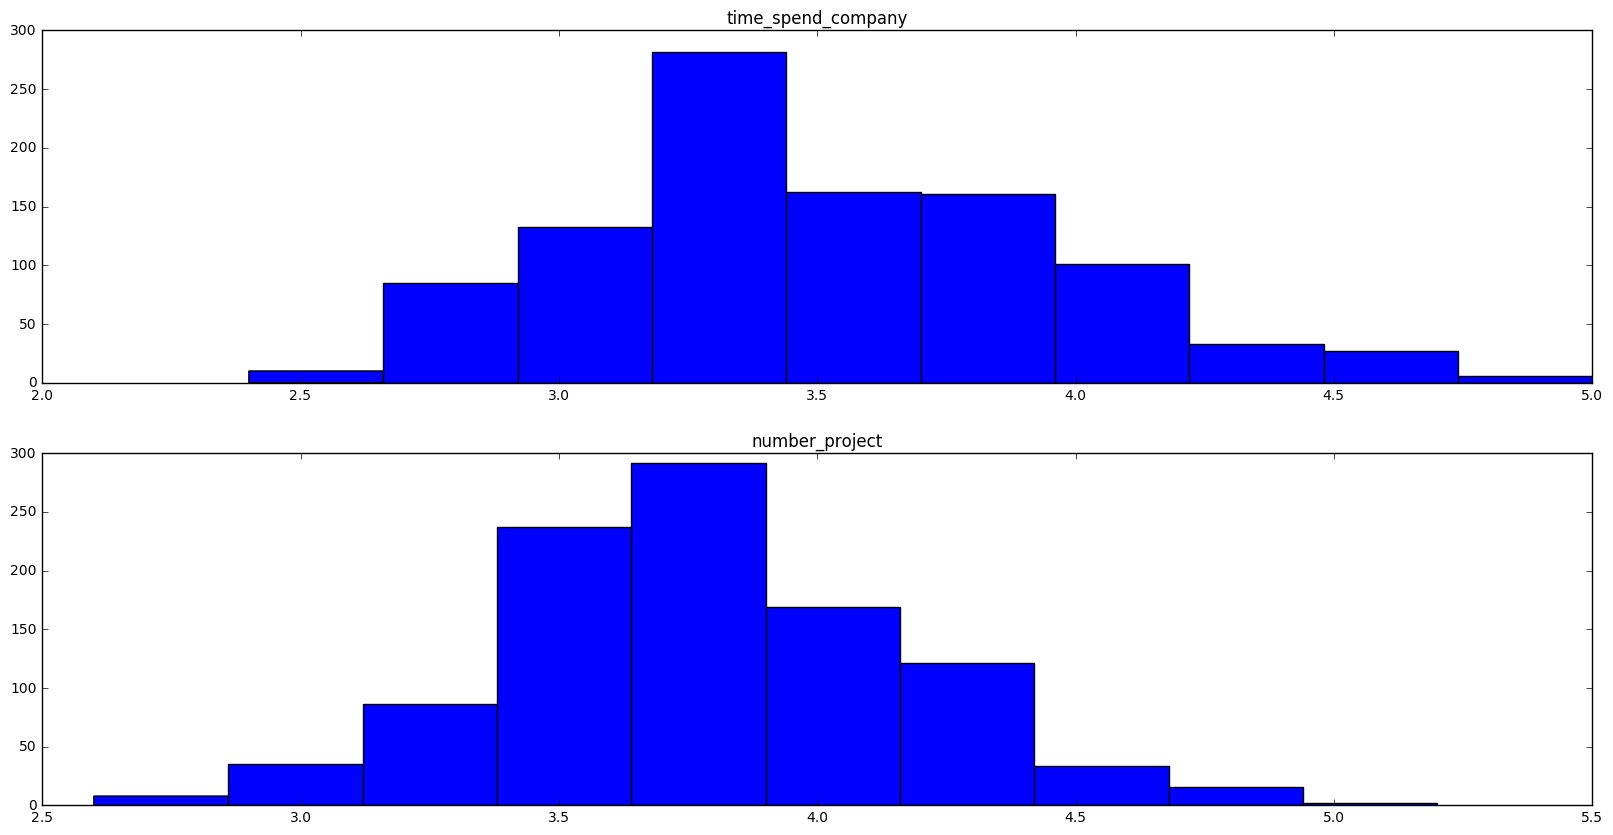

In [33]:
#3. Plot a histogram for each variable used in part 2.
fig, ax = plt.subplots(2, 1, figsize=(20,10))  
for i, v in enumerate(var_p):

    ax[i].hist(sample_means[v])
    ax[i].set_title(v)


In [34]:
#4. Repeat parts 2-3 for n = 100, n = 500, and n = 1000. Comment on your results.
#n=10
sample_means_100=random_samples(100, nr_trials, var_p)  
sample_means_500=random_samples(500, nr_trials, var_p)
sample_means_1000=random_samples(1000, nr_trials, var_p) 

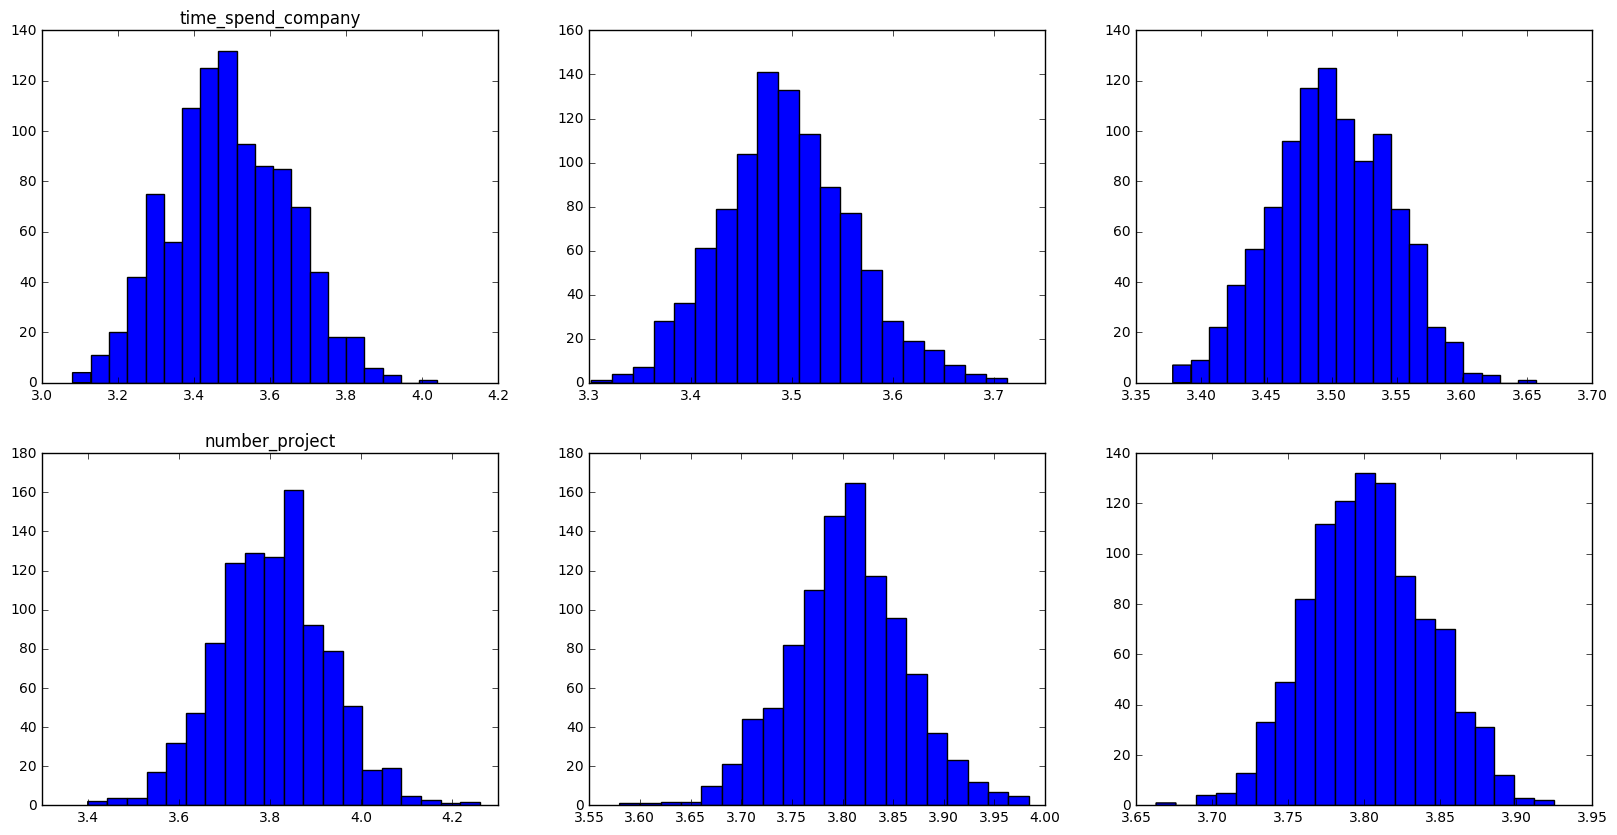

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))  
for i, v in enumerate(var_p):
    ax[i,0].hist(sample_means_100[v], bins=20)
    ax[i,0].set_title(v)
    ax[i,1].hist(sample_means_500[v], bins=20)
    ax[i,2].hist(sample_means_1000[v], bins=20)
#as n is larger, the shape of the histogram is more like the normal distirbution

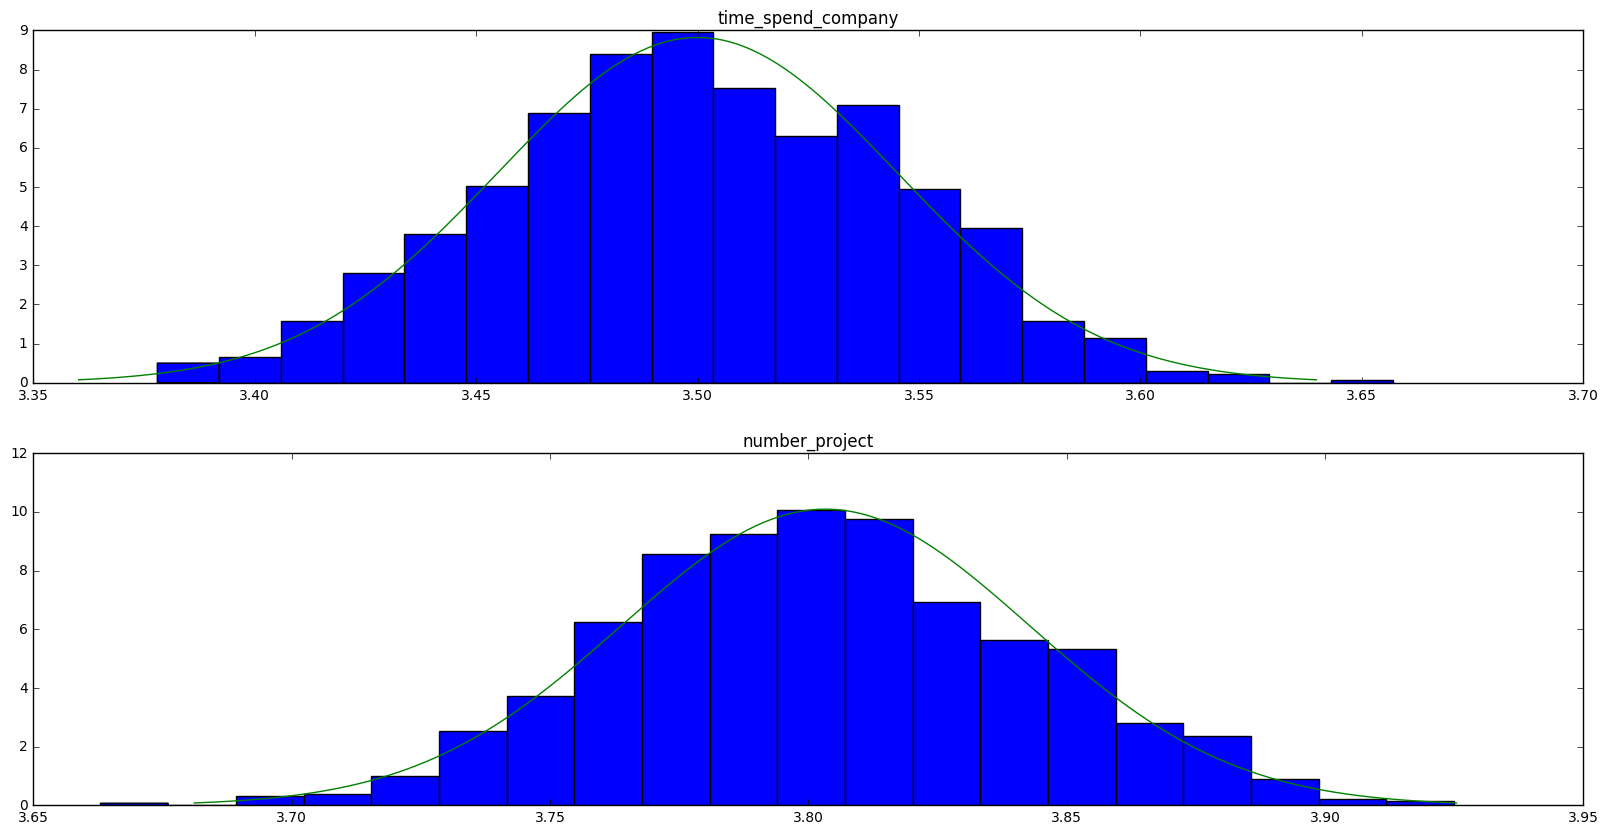

In [56]:
#5. Overlay a normal curve on your n = 1000 plots, using the mean and variance computed from the data.

fig, ax = plt.subplots(2, 1,figsize=(20, 10))    
for i, v in enumerate(var_p): 
    m=np.mean(sample_means_1000[v])
    std=np.std(sample_means_1000[v])
    ax[i].hist(sample_means_1000[v], normed=True, bins=20)
    normal=stats.norm(loc=m, scale=std)
    x=np.linspace(normal.ppf(0.001),normal.ppf(0.999), num=1000)
    ax[i].plot(x, normal.pdf(x))
    ax[i].set_title(v)

    




## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05.  If a test produces a P-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise, you'll explore the HR data more and test some hypotheses.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
1. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, are the means different?  Comment on your results.  (Hint: Do the two populations have equal variance?)
1. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
1. Test the hypothesis that the satisfaction level between each salary group, denoted by k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
1. How would you interpret your results in part 5?
1. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
1. Repeat parts 4-6 on a hypothesis of your choosing.
1. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

In [53]:
#1.Compute a confidence interval for satisfaction levels, at the 95% level, of employees who left the company and those who didn't. Do this using both a t distribution and a normal. Comment on your results.
#data_nonleft=df[df['left']==0]['satisfaction level']
left=df['left'].unique()

for l in left:
    data=df[df['left']==l]['satisfaction_level']
    avg=data.mean()
    sigma=data.var()**(0.5)

    print("Left=", l, "Normal dist: ", stats.norm.interval(0.95,  loc=avg, scale=sigma/(length)**(0.5)))
    print("Left=", l, "T dist: ", stats.t.interval(0.95, length, loc=avg, scale=sigma/(length)**(0.5)))
    #print(stats.t.ppf(0.025, loc=avg, scale=sigma/(length)**(0.5)))
    #print(stats.t.ppf(0.975, loc=avg, scale=sigma/(length)**(0.5)))




Left= 1 Normal dist:  (0.43587413391120539, 0.44432188961161295)
Left= 1 T dist:  (0.43587379303259788, 0.44432223049022046)
Left= 0 Normal dist:  (0.66333515482954974, 0.67028402612948235)
Left= 0 T dist:  (0.66333487443299743, 0.67028430652603466)


In [38]:
#2.Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not. 

data_left=df[df['left']==1]['satisfaction_level']
data_nonleft=df[df['left']==0]['satisfaction_level']

print( "The variance of employees who did't leave is ", data_left.var())
print( "The variance of employees who left is ", data_nonleft.var())
#H0: left<nonleft
#H1: left>=nonleft
stats.ttest_ind(data_left,data_nonleft, equal_var = False)
#this is a 2-sided test, where the p value is 0. 
#For one sided test with our hypothesis, the p value should be tranformed-> p is around 1.
#That means, we can accept the H0 hypothesis!!!!!

The variance of employees who did't leave is  0.06966085873834325
The variance of employees who left is  0.04713404022655909


Ttest_indResult(statistic=-46.636414352775716, pvalue=0.0)

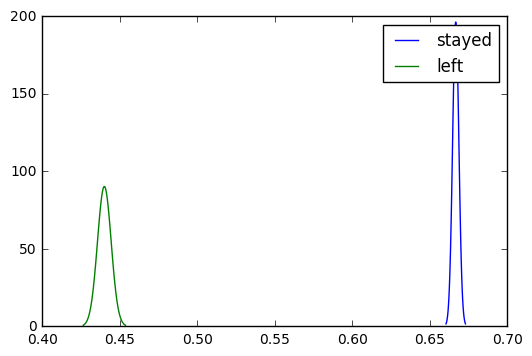

In [75]:
#3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other. 

x={}
normals={}
for i, l in enumerate(left):
    data=df[df['left']==l]['satisfaction_level']
    avg=data.mean()
    sigma=data.std()/np.sqrt(len(data))
    normals[l]=stats.norm(loc=avg, scale=sigma)
    x[l]=np.linspace(normals[l].ppf(0.001), normals[l].ppf(0.999), num=100)

plt.plot(x[0], normals[0].pdf(x[0]), label='stayed')
plt.plot(x[1], normals[1].pdf(x[1]), label='left')
plt.legend()
# We can see, that the people who left have  lower significance level, while by people who stayed is the significance level higher



In [78]:
#4.Test the hypothesis that the satisfaction level between each salary group, denoted by k, differs signicantly from the mean.

#H0: mu=mu_s
#H1: mu <>mu_s
#ttest_1samp
salary=df['salary'].unique()
t_test_results={}
for s in salary:
    data=df[df['salary']==s]['satisfaction_level']
    #t_test_results[s]=stats.ttest_ind(data,df['satisfaction_level'], equal_var = False)
    t_test_results[s]=stats.ttest_1samp(data,df['satisfaction_level'].mean())
t_test_results    
#5.
#we can refuse H0 at all salary levels, that means, the average of the satisfaction level in each salary group differs fro mthe total average.
# IF we would choose the significance level to 99%, we shoul refuse H0 at the medium slaary group 
#-> this group is hast the closest average to the total average

#Question:what is the difference between 1sample test and test ind?

{'high': Ttest_1sampResult(statistic=3.8205997501861702, pvalue=0.00013974368695866474),
 'low': Ttest_1sampResult(statistic=-4.0585381216022212, pvalue=4.9895149767038095e-05),
 'medium': Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)}

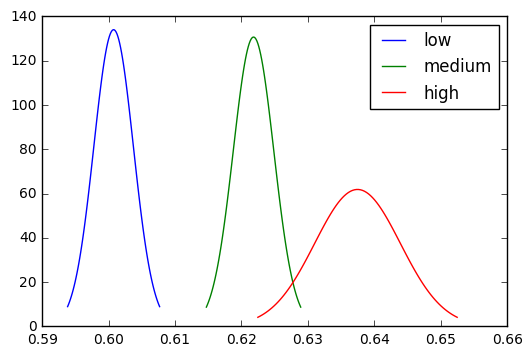

In [80]:
#6. Generate plots for part 5 as you did in part 3. What conclusions can you draw from the plot?
x={}
normals={}
for i, s in enumerate(salary):
    data=df[df['salary']==s]['satisfaction_level']
    avg=data.mean()
    sigma=data.std()/np.sqrt(len(data))
    normals[s]=stats.norm(loc=avg, scale=sigma)
    x[s]=np.linspace(normals[s].ppf(0.01),normals[s].ppf(0.99), num=100)
    plt.plot(x[s], normals[s].pdf(x[s]), label=s)
plt.legend()    
# The satisfactory level increases as the salary increases 

In [115]:
#7.Repeat parts 4-6 on a hypothesis of your choosing.
#number_project, time_spend_company
#Hypothesis: the average monthly hours increases as the time spent at the company increases
def new_value(value):
    if value>4:
        return 5
    else:
        return value
df.groupby('number_project').count()
df['project_new']=df['number_project'].apply(lambda x: new_value(x))



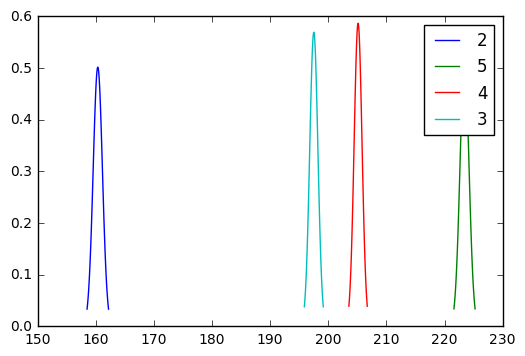

{2: Ttest_1sampResult(statistic=-51.205175282978416, pvalue=0.0), 3: Ttest_1sampResult(statistic=-5.0571786380230259, pvalue=4.4431787557103829e-07), 4: Ttest_1sampResult(statistic=5.9889766203314299, pvalue=2.2814617624257738e-09), 5: Ttest_1sampResult(statistic=28.600490364230364, pvalue=1.6886309906781949e-164)}


In [117]:
projects=df['project_new'].unique()

#H0: for each nr of projects, the average hours spent at the company is the same as the total average
#H1: the average number of hours differs based on how many projects employee has
x={}
normals={}
t_test={}
for y in projects:
    data=df[df['project_new']==y]['average_montly_hours']
    t_test[y]=stats.ttest_1samp(data, df['average_montly_hours'].mean())
    normals[y]=stats.norm(loc=data.mean(), scale=data.std()/np.sqrt(len(data)))
    x[y]=np.linspace(normals[y].ppf(0.01), normals[y].ppf(0.99), 100)
    plt.plot(x[y], normals[y].pdf(x[y]), label=y)
plt.legend()
plt.show()
print(t_test)

#As the number of projects increases, the working hours increases as well
#Employees with 2 projects are working the least
# The difference between the working hours between people with 3 and 4 projects are the smallest
#Alle tge p-values are 0, that means all the averages differ from the total average working hours

In [127]:
#Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good). 
#Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

import statsmodels.stats.power as sm

effect_size=(df[df['salary']=='high']['satisfaction_level'].mean()-df[df['salary']=='medium']['satisfaction_level'].mean())/df['satisfaction_level'].std()
r=len(df[df['salary']=='high'])/ len(df[df['salary']=='medium'])
sm.TTestIndPower().power(effect_size=effect_size, nobs1=len(df[df['salary']=='high']), alpha=0.95, ratio=r)


0.96628845718568357

## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute a statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations

In this exercise, you will implement this algorithm on the HR data.

Write a function that can perform boostrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [119]:
def bootstrapping_median(nr_sample, nr_trials, var):
    data=df[var]
    sample_medians=[]
    for i in range(nr_trials):
        
        samples=data.sample(n=nr_sample, replace=True)
        sample_medians.append(np.median(samples))
    return sample_medians

sample_medians=bootstrapping_median(100, 100, 'satisfaction_level')
print("Median of medians: ", np.median(sample_medians))
print("Mean of medians: ",np.mean(sample_medians))
print("Median of dataset: ",np.median(df['satisfaction_level']))

Median of medians:  0.645
Mean of medians:  0.64175
Median of dataset:  0.64
